# **TravelTide Advanced Customer Segmentation: Data-Driven Insights for Strategic Decision-Making**


## **Description:**

This **Jupyter Notebook** provides a **comprehensive, rule-based customer segmentation framework** for **TravelTide**, designed to transform behavioral data into **actionable business insights**. By leveraging **dynamic thresholds, statistical analysis, and predictive modeling**, the notebook enables data-driven decision-making for marketing, product, and business teams.

#### **Core Capabilities:**
- **Rule-Based Segmentation**: Classifies customers using **quantile-based thresholds** (e.g., spending, trip frequency, browsing behavior) and fallback logic to ensure robustness.
- **Behavioral & Predictive Analytics**: Evaluates engagement, spending patterns, and conversion metrics, with **Random Forest feature importance** to identify key drivers of segmentation.
- **Business Impact Assessment**: Quantifies segment value, revenue contribution, and cancellation risk, providing **ROI-focused recommendations** for targeted campaigns.
- **Visualization & Reporting**: Generates **interactive visualizations** (e.g., pie charts, bar plots, feature importance graphs) and exports results for stakeholder review.

#### **Outcomes:**
- **Segment Profiles**: Detailed breakdowns of customer groups, including demographics, spending, and engagement metrics.
- **Strategic Recommendations**: Tailored marketing and retention strategies for high-value, at-risk, and large segments.
- **Automated Insights**: Statistical validation, predictive modeling, and visualization outputs saved for further analysis.

#### **Audience:**
- **Data Teams**: For segmentation, predictive modeling, and statistical validation.
- **Marketing & Product Teams**: To design targeted campaigns and optimize user experience.
- **Business Leaders**: For data-driven decision-making and revenue growth strategies.


In [28]:
import sys, os  # noqa: E401

# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


In [29]:
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401
from IPython.display import display

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
project_root = os.path.abspath(os.path.join(cwd, "..", "..", ".."))
print("Project root:", project_root)

## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))


Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/segments/non_ml
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/opt/anaconda3/envs/ml311/lib/python311.zip', '/opt/anaconda3/envs/ml311/lib/python3.11', '/opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml311/lib/python3.11/site-packages', '__editable__.tts_mastery_project-0.1.0.finder.__path_hook__']
True


In [30]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")

✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


In [31]:
from src.core import (
    DataLoader, # noqa: F401
    AdvanceSegmentAnalyzer
) 

In [32]:
loader = DataLoader()
user_segment = loader.load_table(data_type='non_ml', table_name='customer_segmentation_detailed')

✅ Verbindung zur PostgreSQL-Datenbank hergestellt.
📁 Lade Tabelle 'customer_segmentation_detailed' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/non_ml/customer_segmentation_detailed.csv
✅ CSV geladen. Zeilen: 5998


In [33]:
analyzer = AdvanceSegmentAnalyzer(df=user_segment)

🔍 DATASET DEBUG INFORMATION
Dataset shape: (5998, 57)
Memory usage: 4.60 MB

📊 Segment distribution:
   Baseline Travelers: 1,433 (23.9%)
   Group & Family Travelers / Heavy Baggage: 1,315 (21.9%)
   High-Intent Browsers & Spenders: 1,276 (21.3%)
   Hotel & Business Focused Travelers: 1,168 (19.5%)
   VIP High-Frequency Spenders: 806 (13.4%)

🎁 Segment perk distribution:
   exclusive discounts: 1,433 (23.9%)
   free checked bags: 1,315 (21.9%)
   no cancellation fees: 1,276 (21.3%)
   free hotel meal: 1,168 (19.5%)
   1 night free hotel plus flight: 806 (13.4%)

📈 Data Quality: Missing=15144, Duplicates=0



📊 DESCRIPTIVE SEGMENT ANALYSIS


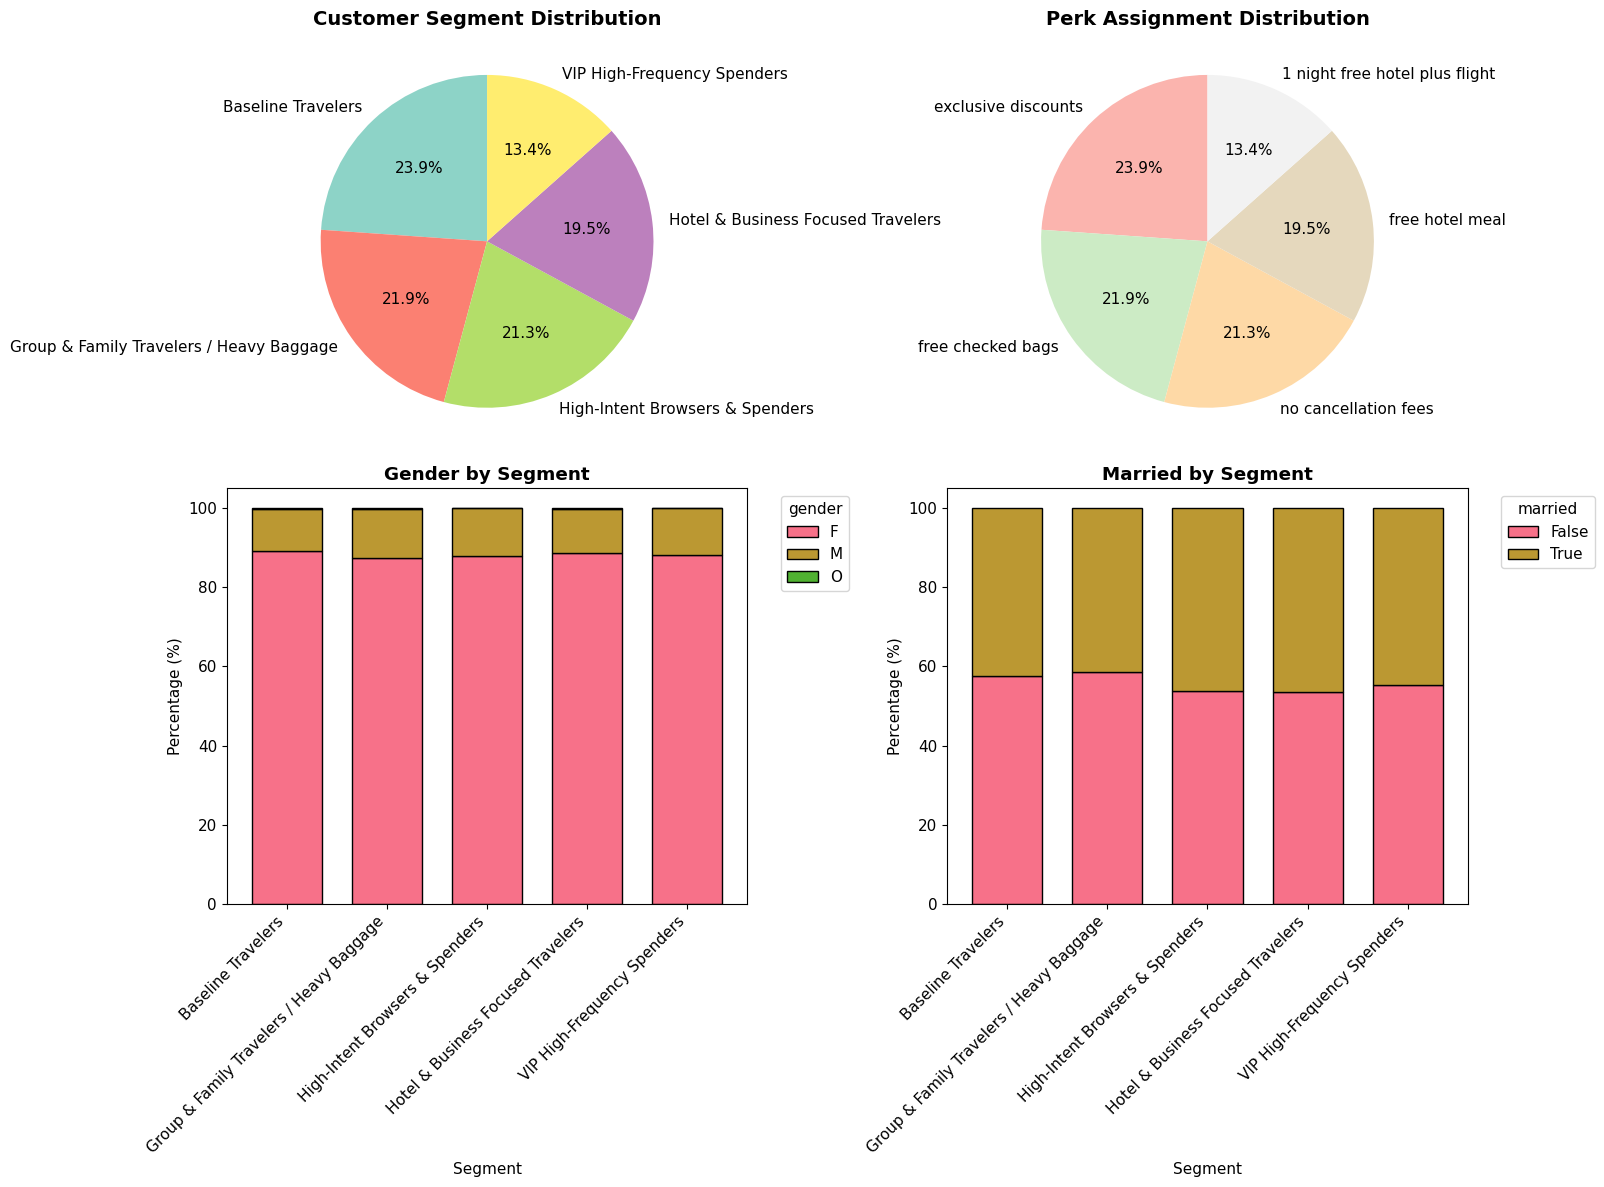


📋 SEGMENT PROFILES:
--------------------------------------------------------------------------------

🎯 High-Intent Browsers & Spenders:
   Assigned Perk: no cancellation fees
   Size: 1,276 customers
   Avg total_spend: 3984.84
   Avg num_trips: 2.93
   Avg num_sessions: 8.21
   Avg age: 44.37
   Avg num_flights: 4.95
   Avg num_hotels: 2.73
   Avg avg_bags: 0.34
   Avg avg_km_flown: 1984.67

🎯 Baseline Travelers:
   Assigned Perk: exclusive discounts
   Size: 1,433 customers
   Avg total_spend: 2842.90
   Avg num_trips: 2.76
   Avg num_sessions: 8.22
   Avg age: 44.04
   Avg num_flights: 4.67
   Avg num_hotels: 2.37
   Avg avg_bags: 0.32
   Avg avg_km_flown: 1857.37

🎯 VIP High-Frequency Spenders:
   Assigned Perk: 1 night free hotel plus flight
   Size: 806 customers
   Avg total_spend: 8371.94
   Avg num_trips: 4.79
   Avg num_sessions: 8.25
   Avg age: 45.84
   Avg num_flights: 8.22
   Avg num_hotels: 4.32
   Avg avg_bags: 0.58
   Avg avg_km_flown: 2410.37

🎯 Group & Family Trave

In [34]:

analyzer.descriptive_analysis()  # Generate pie charts for segment and perk distribution



📈 BEHAVIORAL COMPARISON ANALYSIS


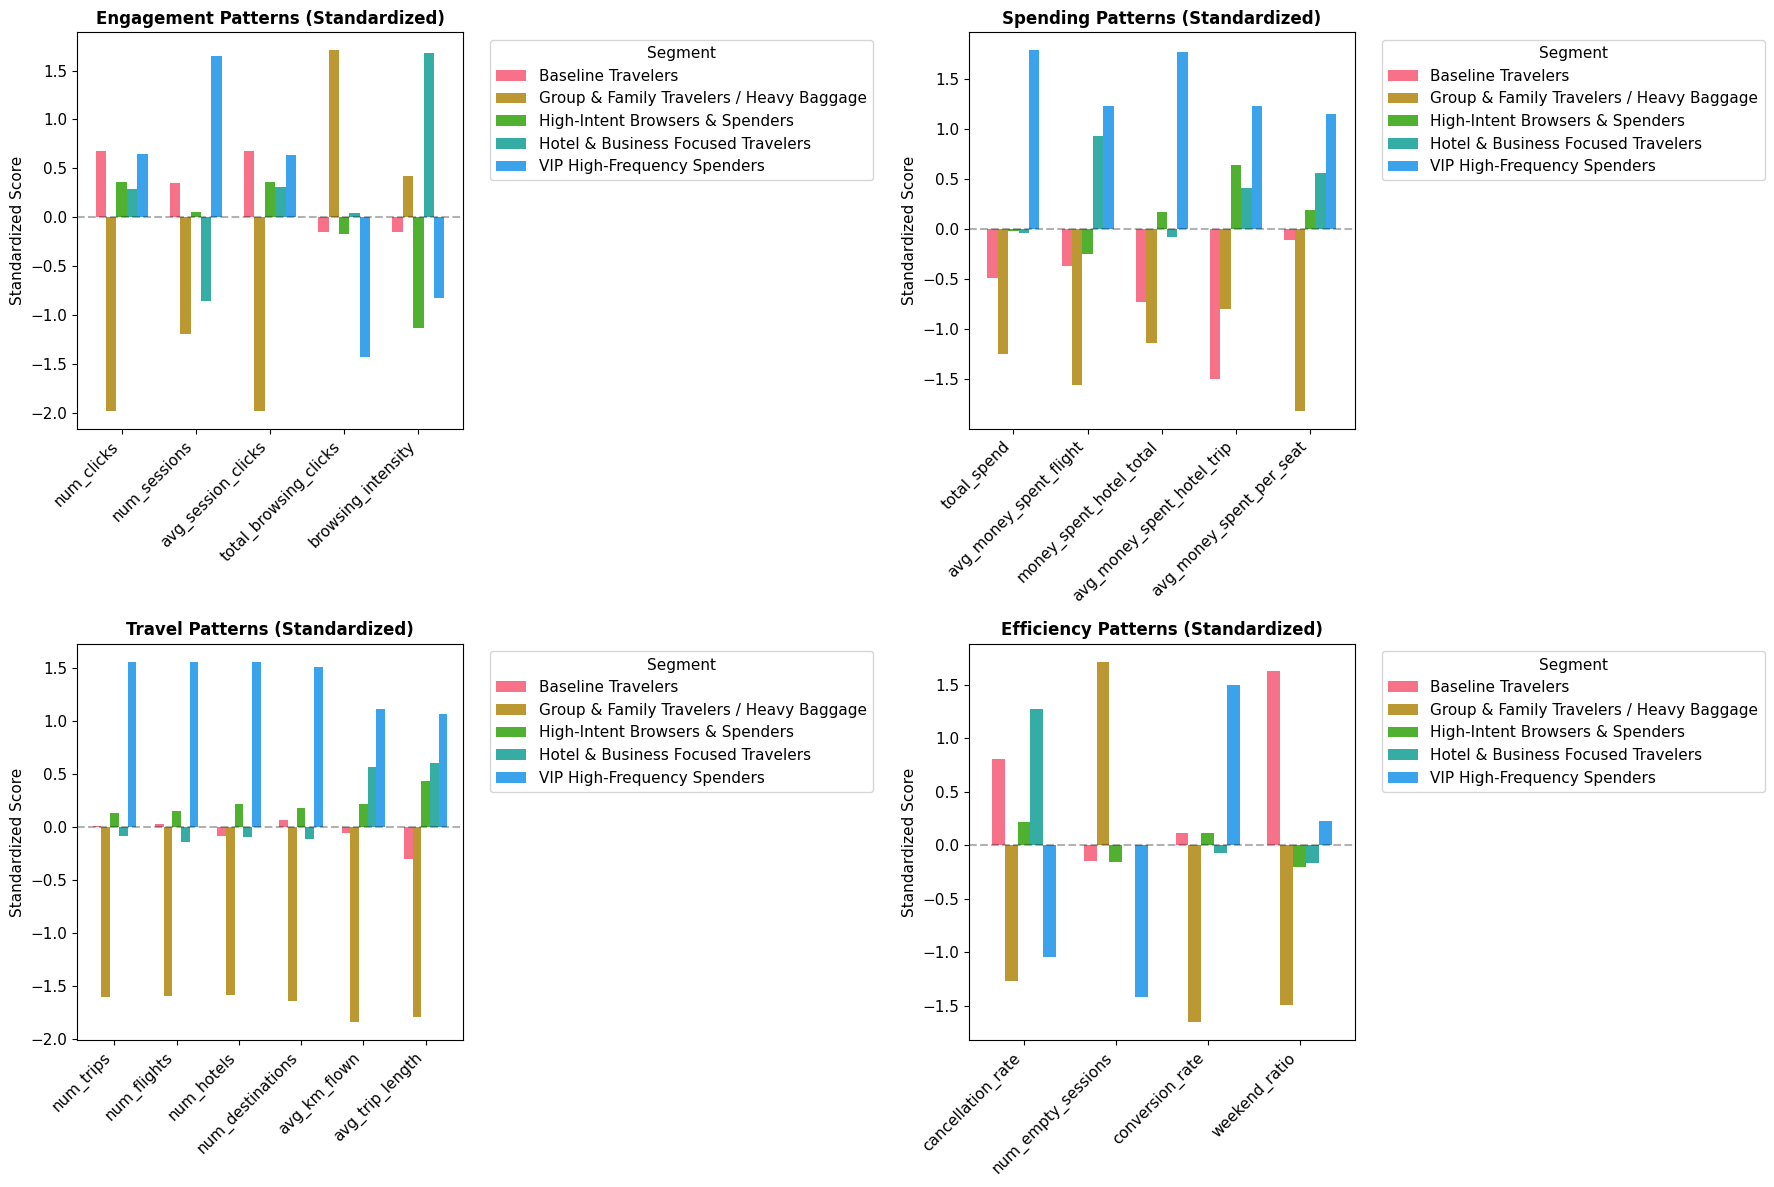


🔬 STATISTICAL SIGNIFICANCE TESTS:
--------------------------------------------------------------------------------
total_spend               | ANOVA    | stat=1387.87 | p=0.0000 ***
num_trips                 | ANOVA    | stat=2656.49 | p=0.0000 ***
num_sessions              | ANOVA    | stat=   3.41 | p=0.0086 **


In [35]:
analyzer.behavioral_comparison()  # Compare engagement, spending, and travel patterns



💰 SPENDING PATTERN ANALYSIS


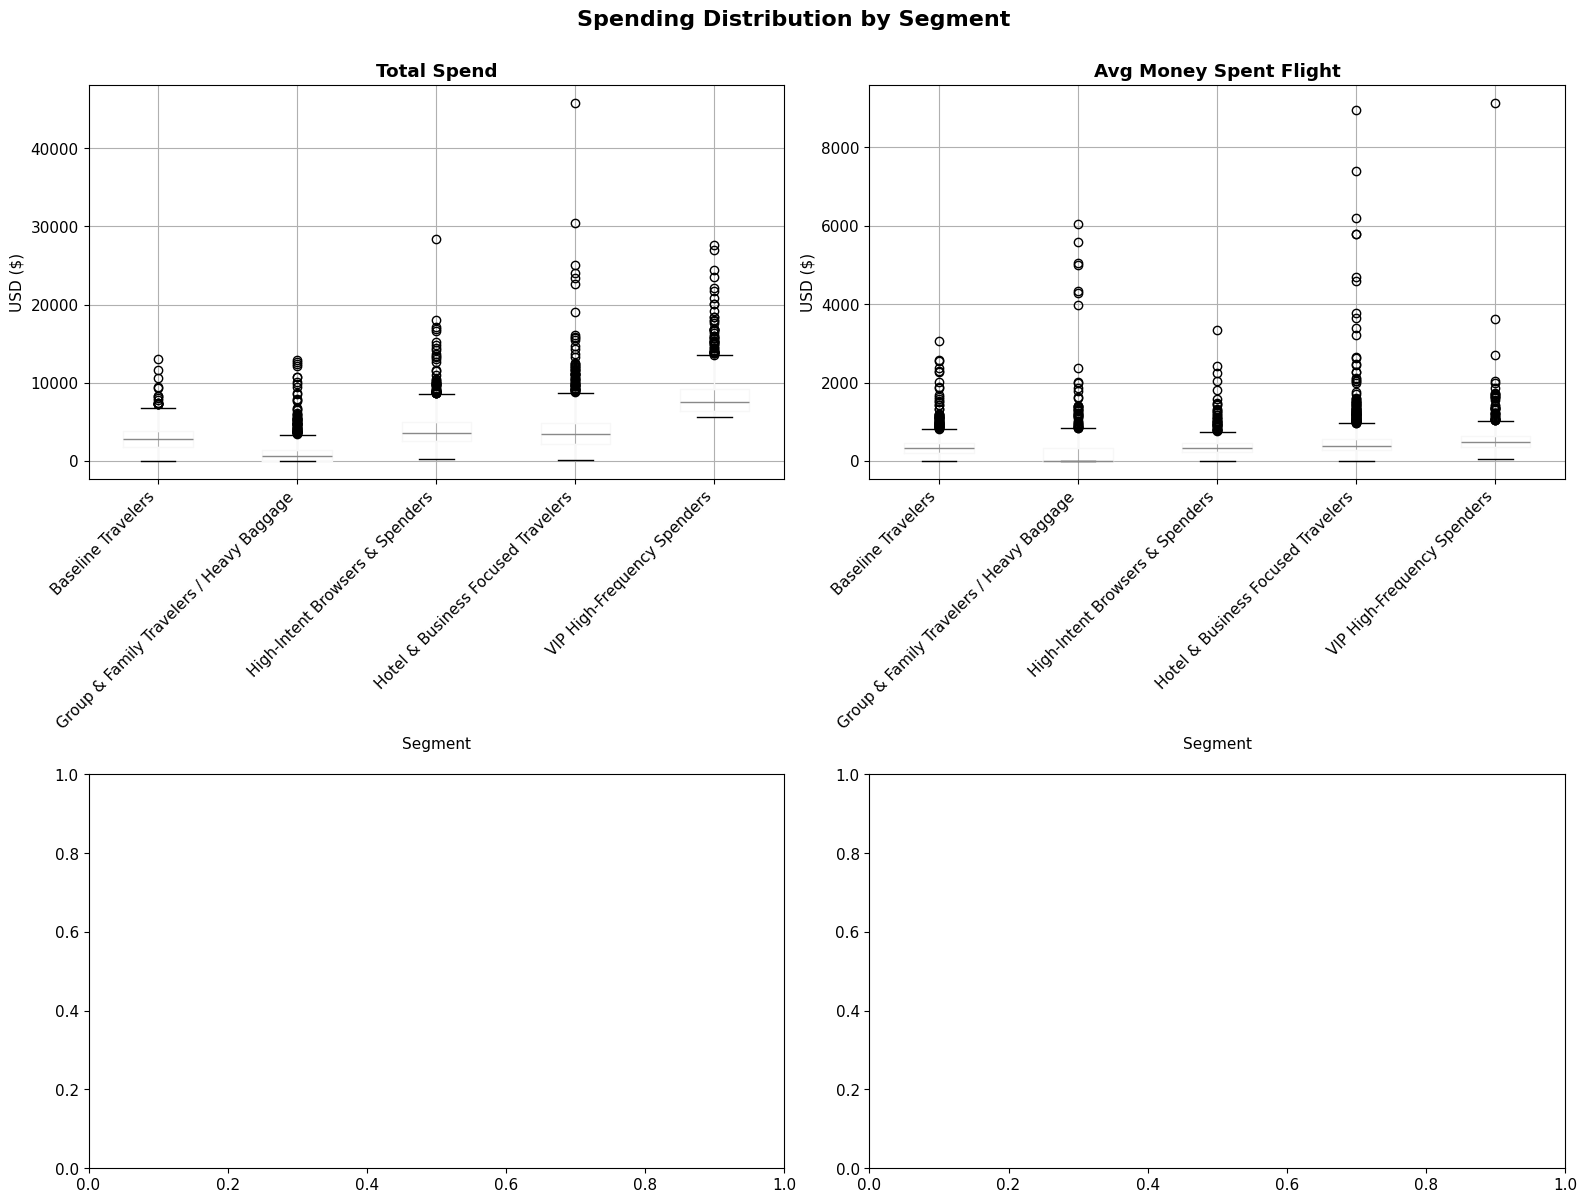


💵 SPENDING METRICS BY SEGMENT:
------------------------------------------------------------

Total Spend:
                                                 mean     median           sum
assigned_group                                                                
Baseline Travelers                        2842.899063  2809.5400  4.073874e+06
Group & Family Travelers / Heavy Baggage   996.169386   615.2400  1.309963e+06
High-Intent Browsers & Spenders           3984.842079  3616.4300  5.084658e+06
Hotel & Business Focused Travelers        3934.355252  3396.2000  4.595327e+06
VIP High-Frequency Spenders               8371.944743  7480.9635  6.747787e+06

Avg Money Spent Flight:
                                                mean      median            sum
assigned_group                                                                 
Baseline Travelers                        353.395294  325.480000  506415.456025
Group & Family Travelers / Heavy Baggage  210.883652    0.000000  277312.00

In [36]:
analyzer.spending_analysis()  # Box plots and spending metrics by segment



🛤️  CUSTOMER JOURNEY ANALYSIS


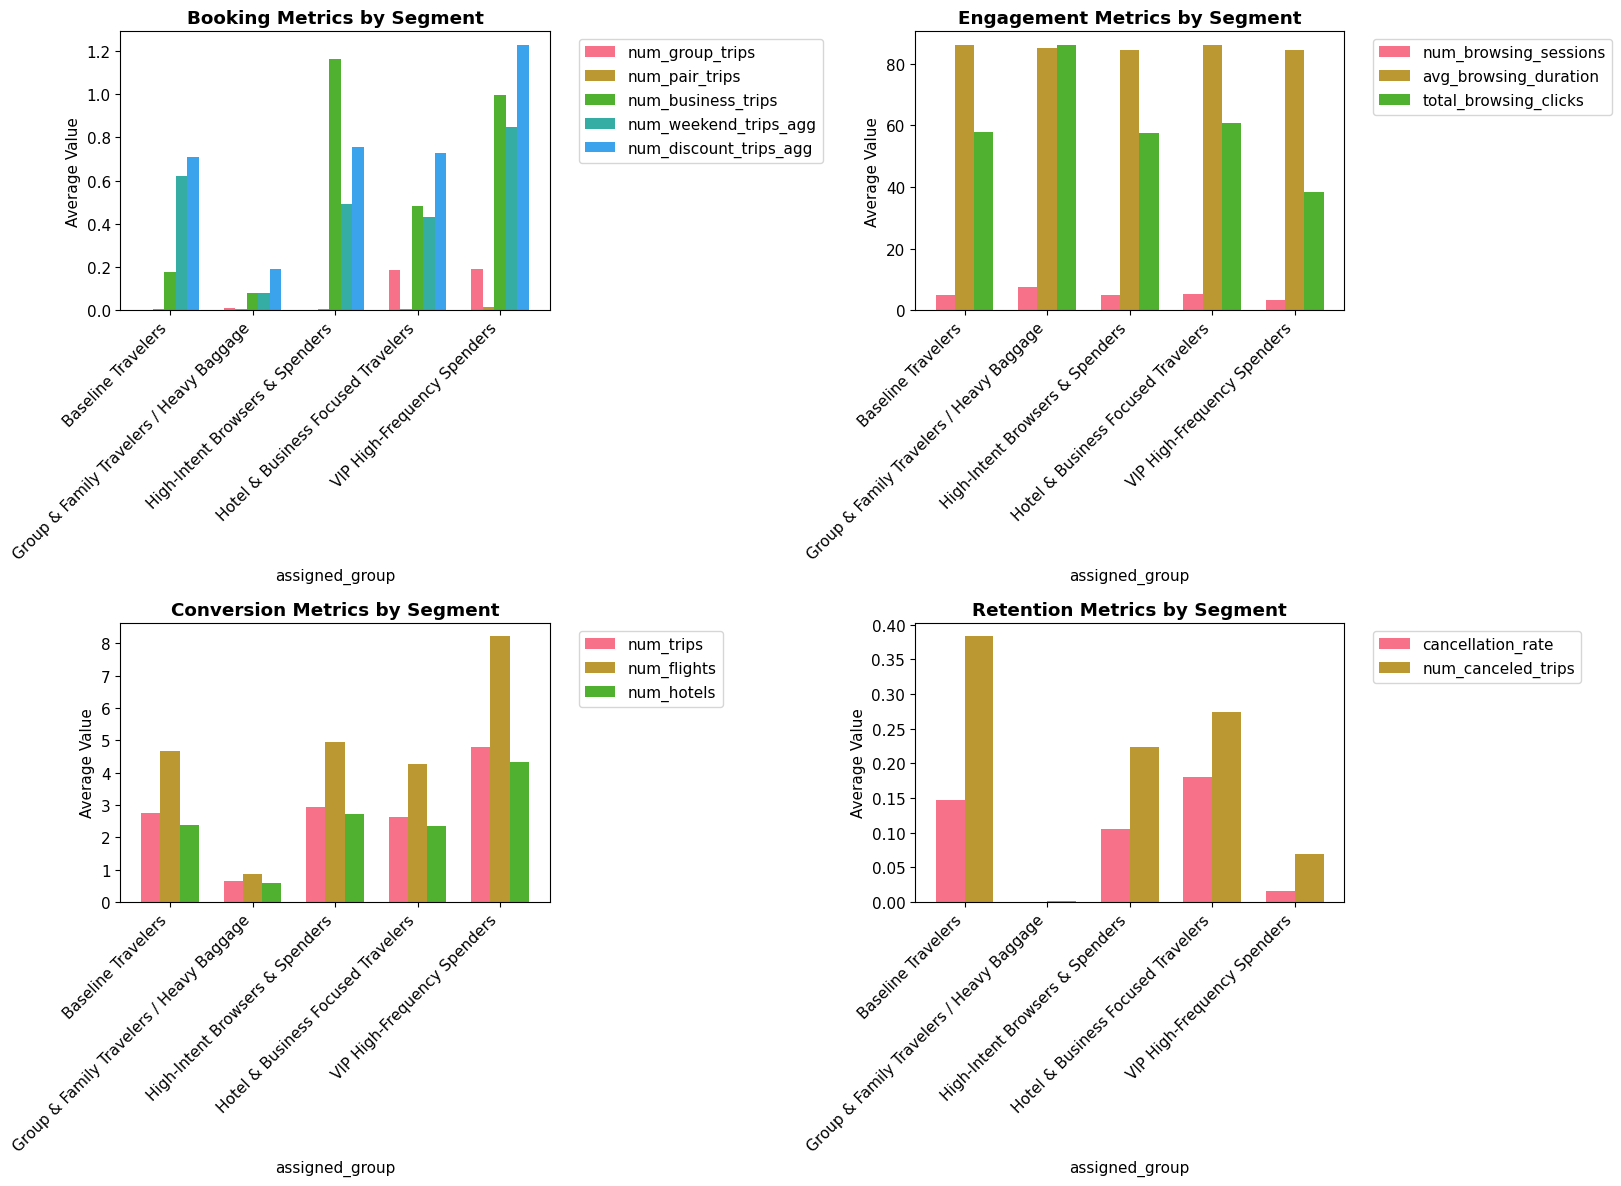


🎯 CONVERSION FUNNEL BY SEGMENT:
------------------------------------------------------------

High-Intent Browsers & Spenders:
  Sessions → Trips: 35.7%

Baseline Travelers:
  Sessions → Trips: 33.6%

VIP High-Frequency Spenders:
  Sessions → Trips: 58.0%

Group & Family Travelers / Heavy Baggage:
  Sessions → Trips: 8.0%

Hotel & Business Focused Travelers:
  Sessions → Trips: 32.2%


In [37]:
analyzer.customer_journey_analysis()  # Conversion funnels and cancellation rates



🔮 PREDICTIVE FEATURE IMPORTANCE


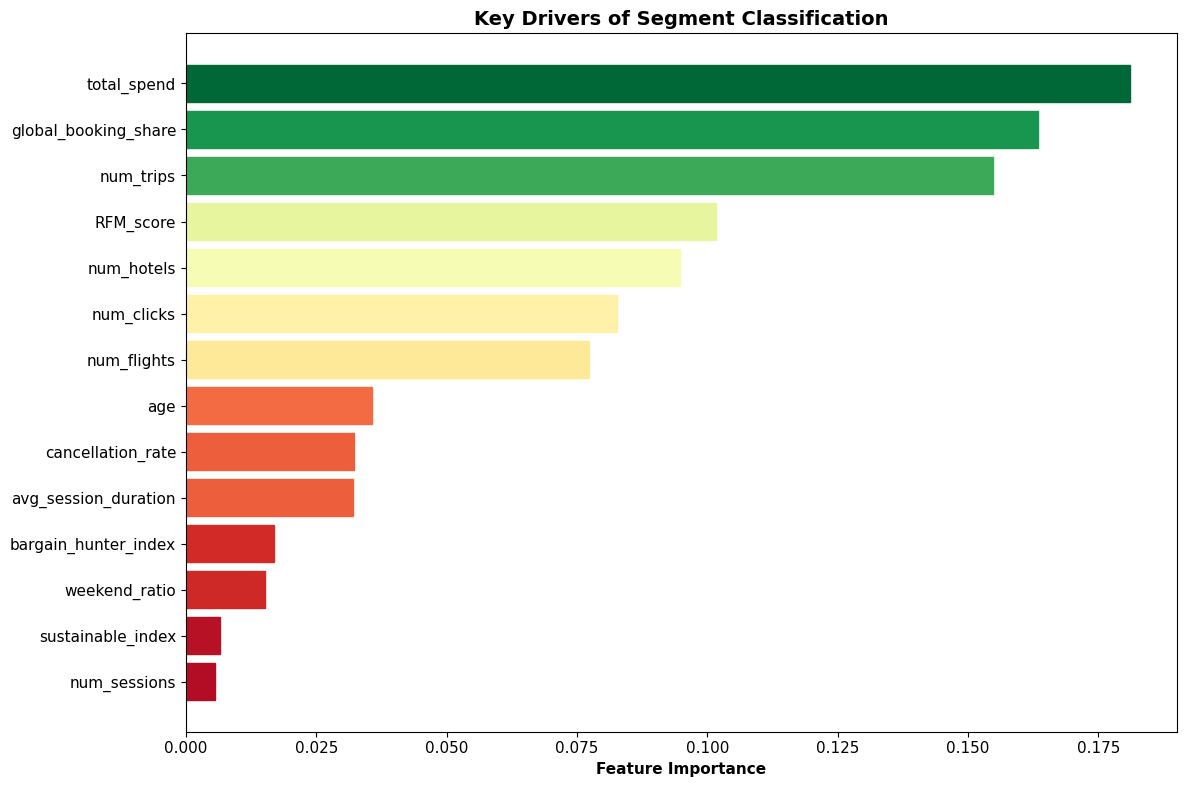


🔑 TOP 5 DISCRIMINATING FEATURES:
             Feature  Importance
         total_spend    0.181021
global_booking_share    0.163502
           num_trips    0.154709
           RFM_score    0.101754
          num_hotels    0.094722


In [38]:
analyzer.predictive_analysis()  # Random Forest to identify key segment drivers


In [39]:
analyzer.business_impact_analysis()  # Revenue share, segment size, and cancellation risk



💼 BUSINESS IMPACT & MARKETING RECOMMENDATIONS

📊 SEGMENT BUSINESS VALUE:
                                                                           Segment                            Perk  Size Pct_of_Base    Avg_Spend   Total_Revenue Revenue_Share_Pct Avg_Trips
High-Intent Browsers & Spenders                    High-Intent Browsers & Spenders            no cancellation fees  1276   21.273758  3984.842079  5084658.493242         23.311706  2.927116
Baseline Travelers                                              Baseline Travelers             exclusive discounts  1433   23.891297  2842.899063  4073874.356983          18.67755   2.76134
VIP High-Frequency Spenders                            VIP High-Frequency Spenders  1 night free hotel plus flight   806   13.437813  8371.944743  6747787.462975         30.936678   4.78536
Group & Family Travelers / Heavy Baggage  Group & Family Travelers / Heavy Baggage               free checked bags  1315   21.923975   996.169386     1309962.743     


🎁 PERK EFFECTIVENESS ANALYSIS

📋 SEGMENT-PERK ASSIGNMENT MATRIX:
assigned_perk                             1 night free hotel plus flight  \
assigned_group                                                             
Baseline Travelers                                                     0   
Group & Family Travelers / Heavy Baggage                               0   
High-Intent Browsers & Spenders                                        0   
Hotel & Business Focused Travelers                                     0   
VIP High-Frequency Spenders                                          806   
All                                                                  806   

assigned_perk                             exclusive discounts  \
assigned_group                                                  
Baseline Travelers                                       1433   
Group & Family Travelers / Heavy Baggage                    0   
High-Intent Browsers & Spenders                             0   


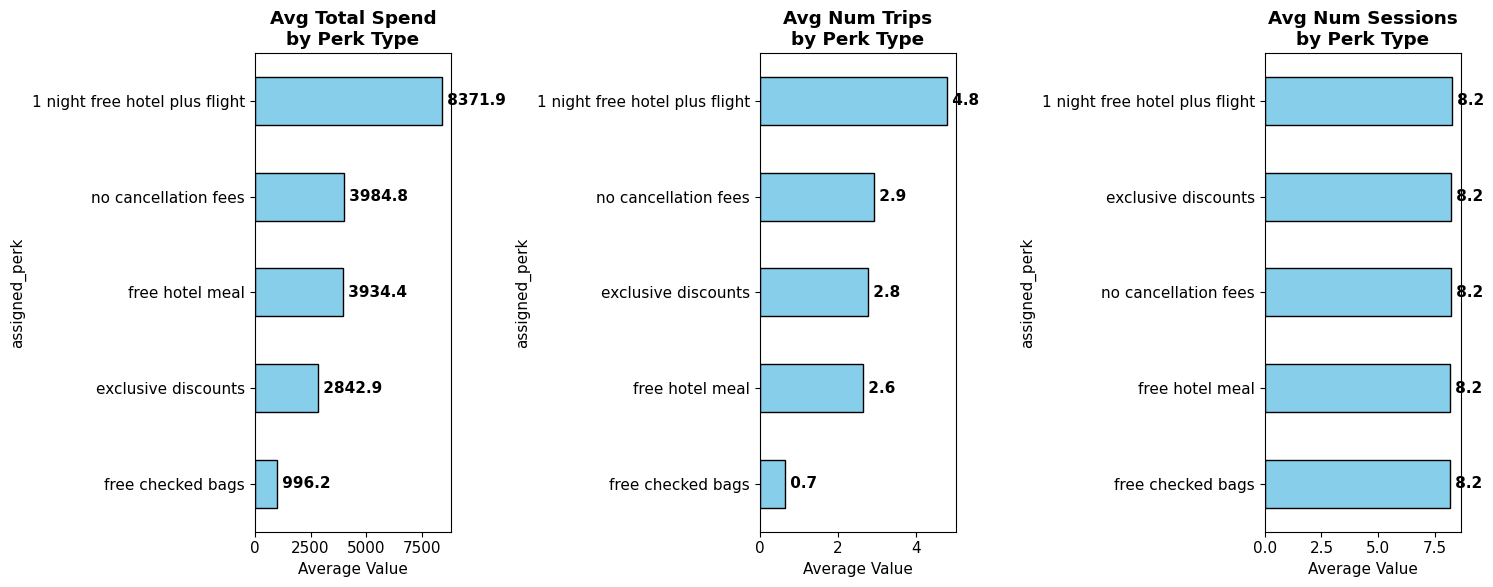

In [40]:
analyzer.perk_effectiveness_analysis()  # Cross-tabulation of segments vs. perks



🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
COMPREHENSIVE CUSTOMER SEGMENTATION ANALYSIS
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

▶️  Running: Descriptive Analysis

📊 DESCRIPTIVE SEGMENT ANALYSIS


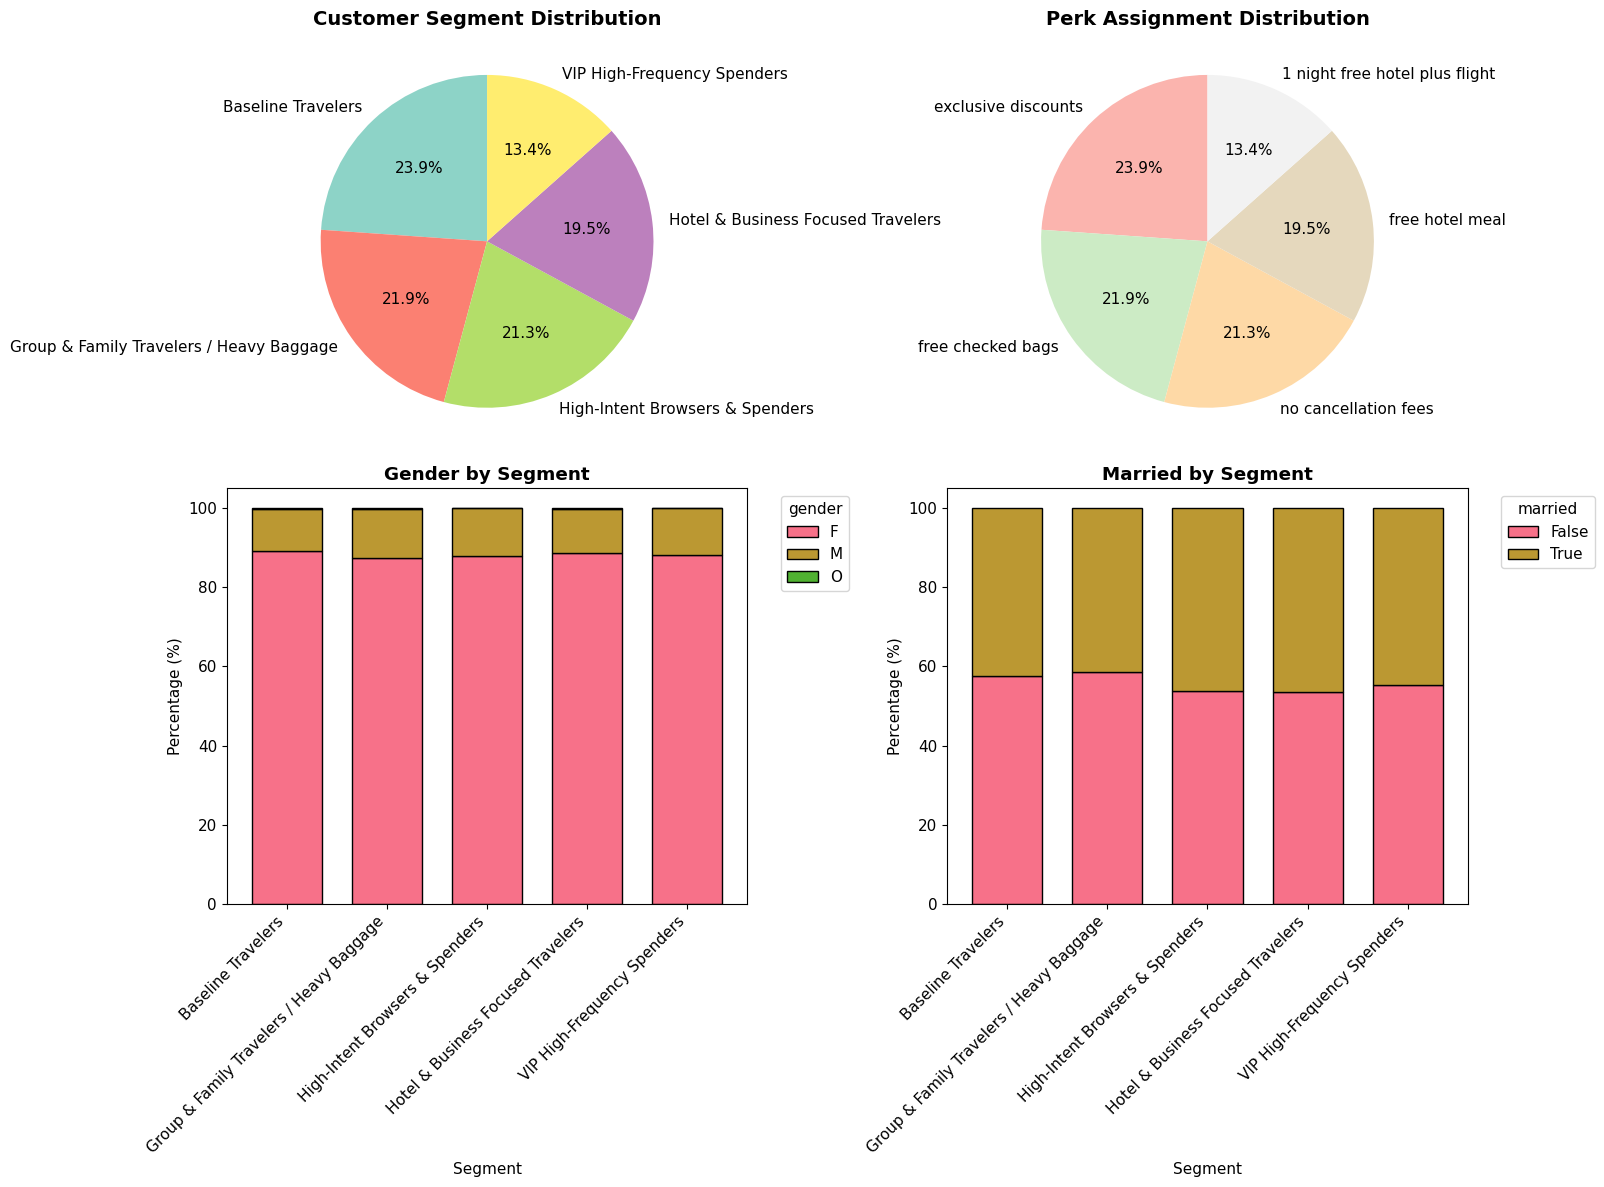


📋 SEGMENT PROFILES:
--------------------------------------------------------------------------------

🎯 High-Intent Browsers & Spenders:
   Assigned Perk: no cancellation fees
   Size: 1,276 customers
   Avg total_spend: 3984.84
   Avg num_trips: 2.93
   Avg num_sessions: 8.21
   Avg age: 44.37
   Avg num_flights: 4.95
   Avg num_hotels: 2.73
   Avg avg_bags: 0.34
   Avg avg_km_flown: 1984.67

🎯 Baseline Travelers:
   Assigned Perk: exclusive discounts
   Size: 1,433 customers
   Avg total_spend: 2842.90
   Avg num_trips: 2.76
   Avg num_sessions: 8.22
   Avg age: 44.04
   Avg num_flights: 4.67
   Avg num_hotels: 2.37
   Avg avg_bags: 0.32
   Avg avg_km_flown: 1857.37

🎯 VIP High-Frequency Spenders:
   Assigned Perk: 1 night free hotel plus flight
   Size: 806 customers
   Avg total_spend: 8371.94
   Avg num_trips: 4.79
   Avg num_sessions: 8.25
   Avg age: 45.84
   Avg num_flights: 8.22
   Avg num_hotels: 4.32
   Avg avg_bags: 0.58
   Avg avg_km_flown: 2410.37

🎯 Group & Family Trave

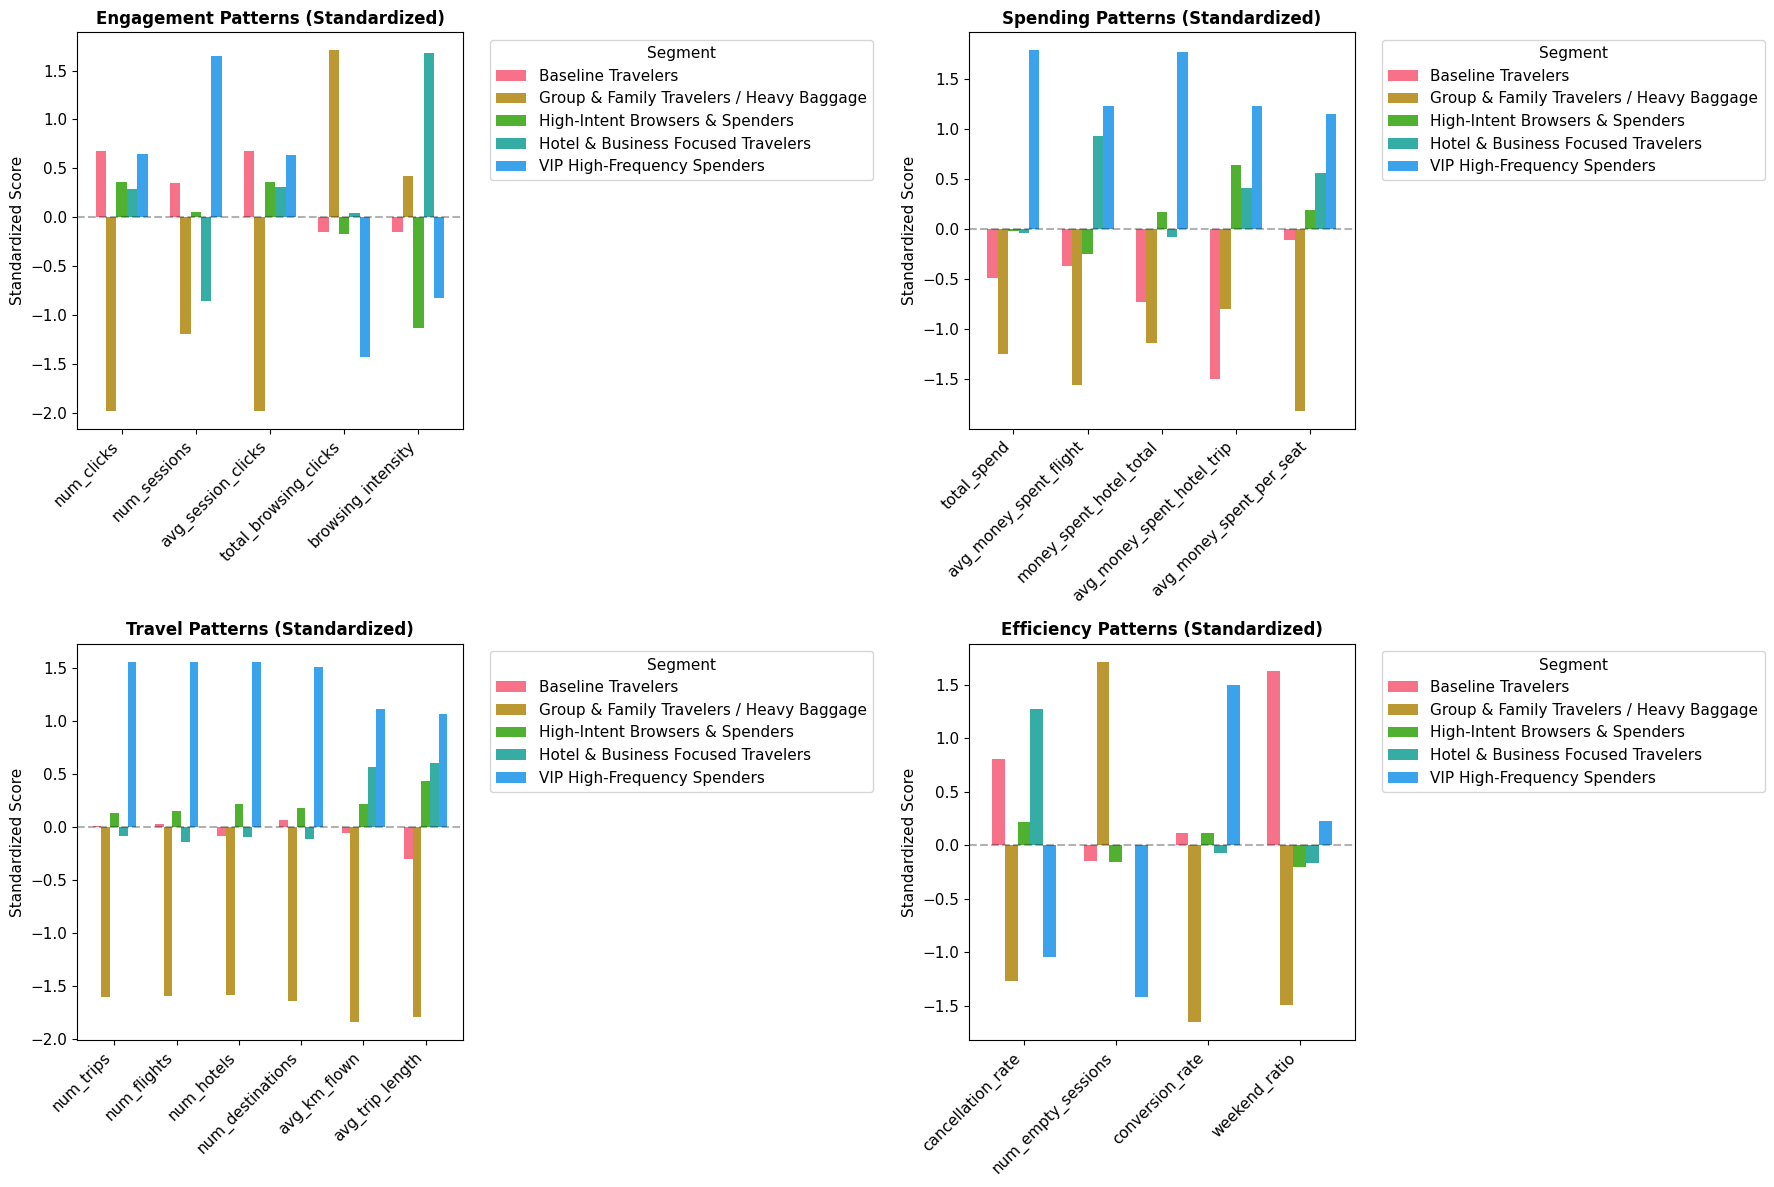


🔬 STATISTICAL SIGNIFICANCE TESTS:
--------------------------------------------------------------------------------
total_spend               | ANOVA    | stat=1387.87 | p=0.0000 ***
num_trips                 | ANOVA    | stat=2656.49 | p=0.0000 ***
num_sessions              | ANOVA    | stat=   3.41 | p=0.0086 **
✅ Behavioral Comparison completed successfully

▶️  Running: Spending Analysis

💰 SPENDING PATTERN ANALYSIS


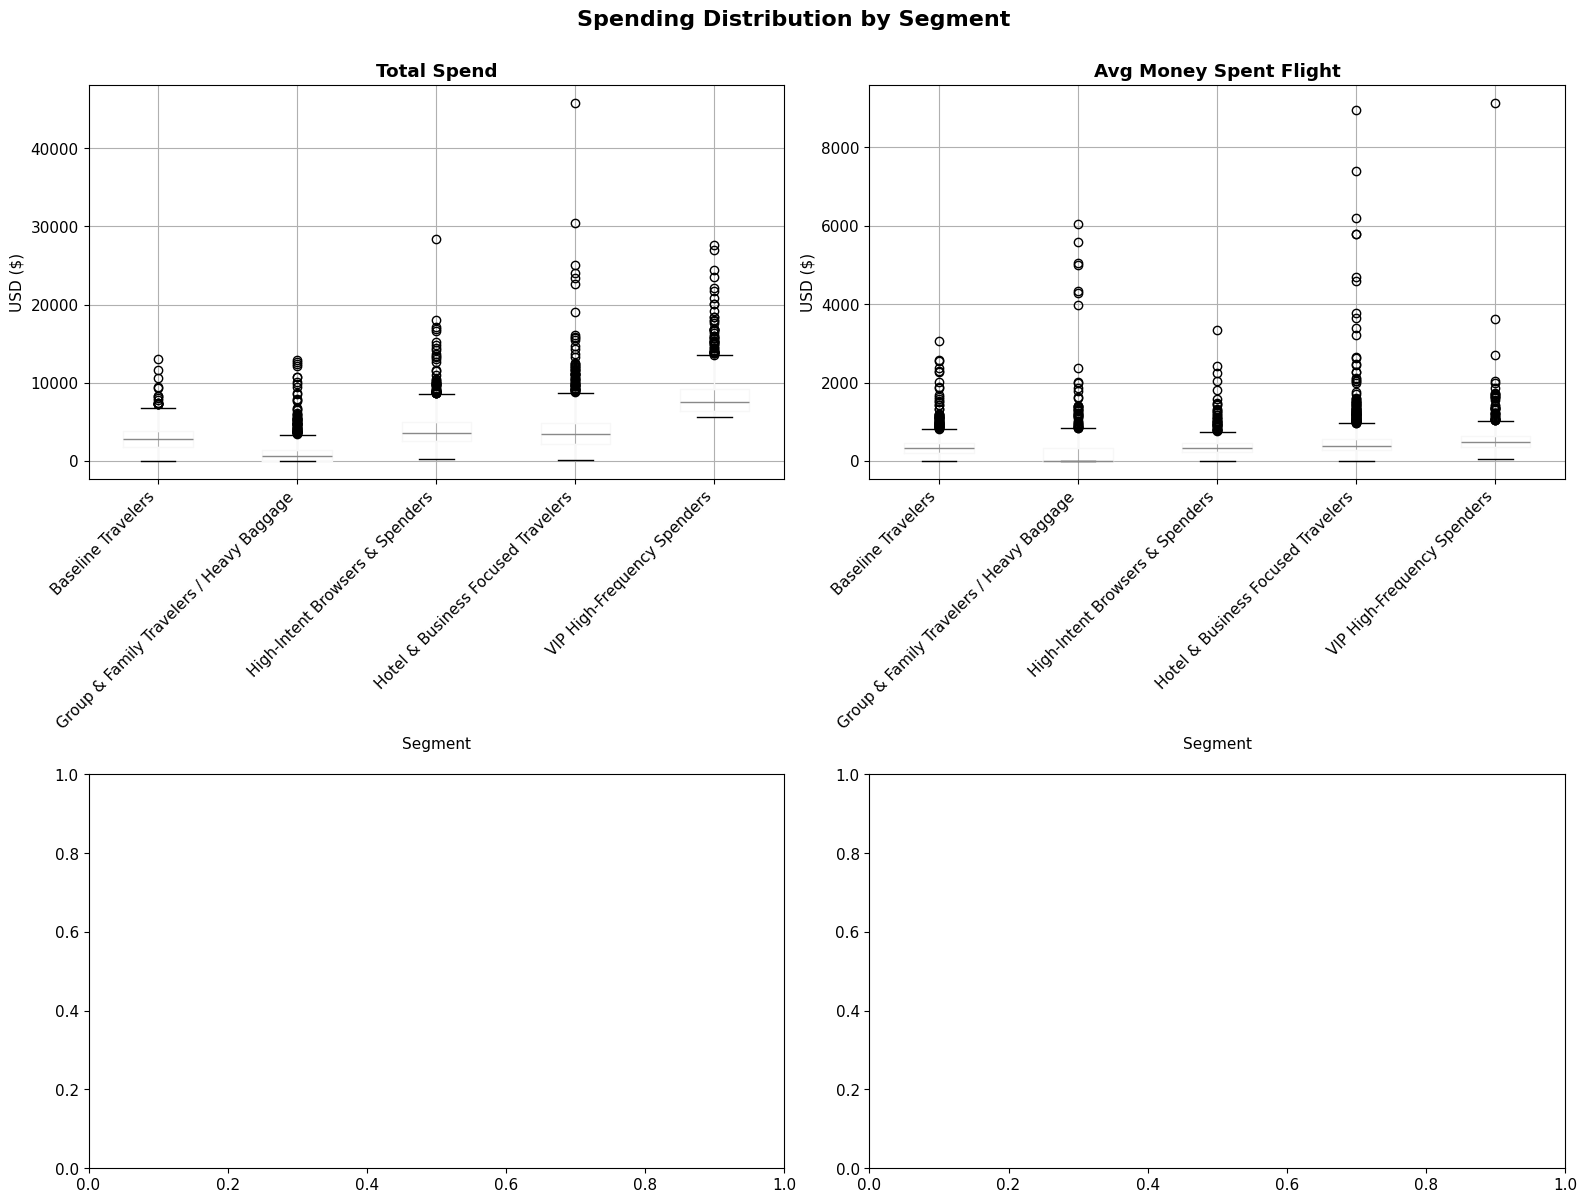


💵 SPENDING METRICS BY SEGMENT:
------------------------------------------------------------

Total Spend:
                                                 mean     median           sum
assigned_group                                                                
Baseline Travelers                        2842.899063  2809.5400  4.073874e+06
Group & Family Travelers / Heavy Baggage   996.169386   615.2400  1.309963e+06
High-Intent Browsers & Spenders           3984.842079  3616.4300  5.084658e+06
Hotel & Business Focused Travelers        3934.355252  3396.2000  4.595327e+06
VIP High-Frequency Spenders               8371.944743  7480.9635  6.747787e+06

Avg Money Spent Flight:
                                                mean      median            sum
assigned_group                                                                 
Baseline Travelers                        353.395294  325.480000  506415.456025
Group & Family Travelers / Heavy Baggage  210.883652    0.000000  277312.00

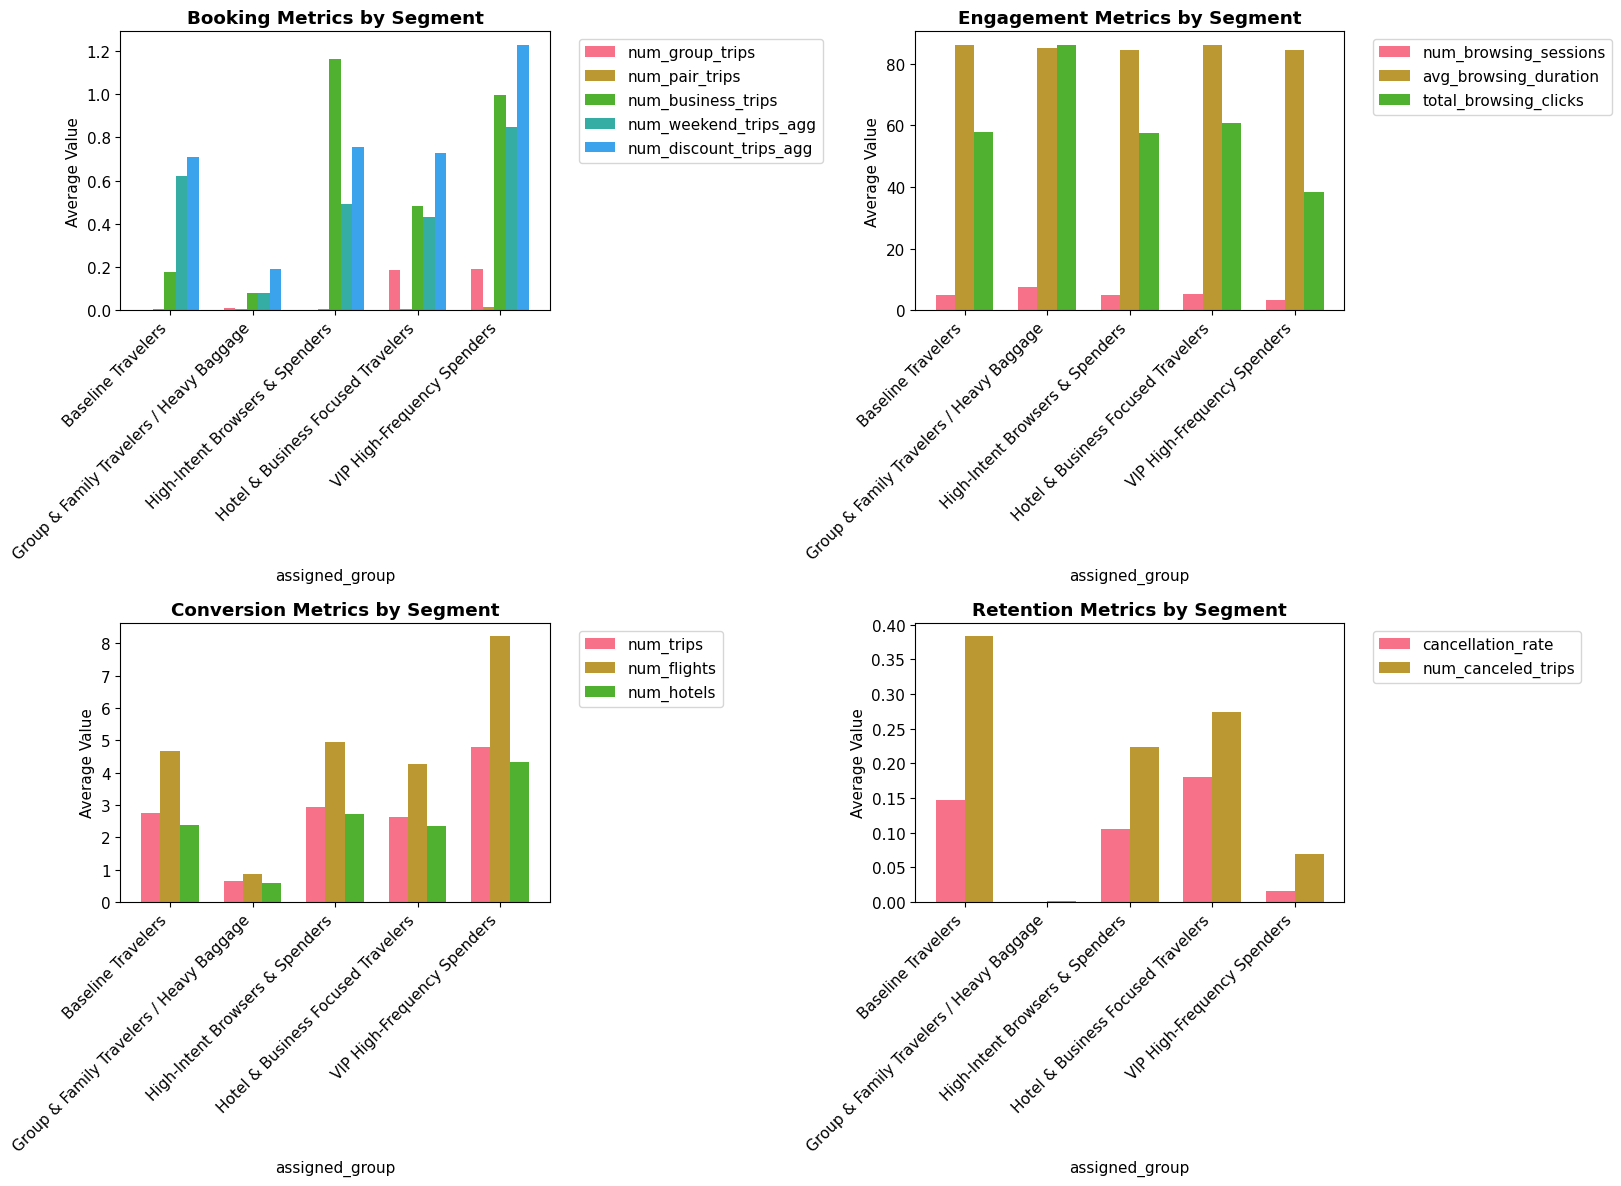


🎯 CONVERSION FUNNEL BY SEGMENT:
------------------------------------------------------------

High-Intent Browsers & Spenders:
  Sessions → Trips: 35.7%

Baseline Travelers:
  Sessions → Trips: 33.6%

VIP High-Frequency Spenders:
  Sessions → Trips: 58.0%

Group & Family Travelers / Heavy Baggage:
  Sessions → Trips: 8.0%

Hotel & Business Focused Travelers:
  Sessions → Trips: 32.2%
✅ Customer Journey completed successfully

▶️  Running: Predictive Analysis

🔮 PREDICTIVE FEATURE IMPORTANCE


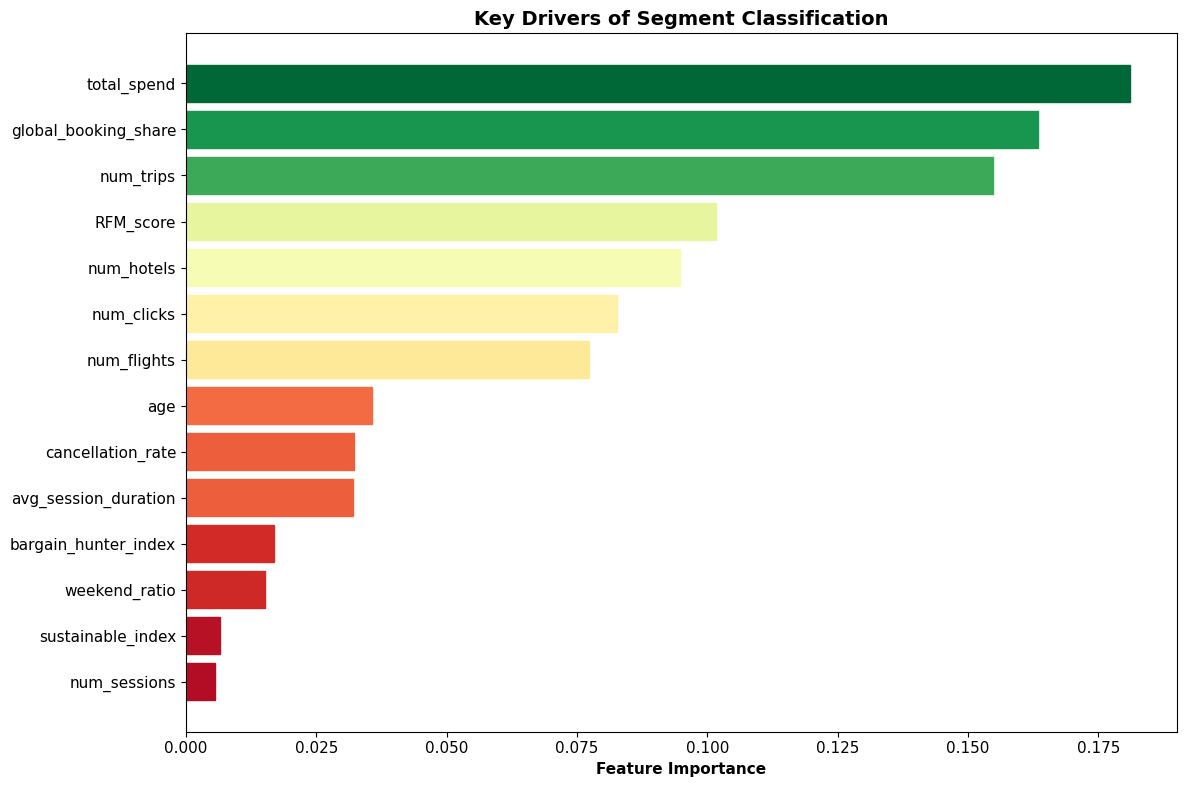


🔑 TOP 5 DISCRIMINATING FEATURES:
             Feature  Importance
         total_spend    0.181021
global_booking_share    0.163502
           num_trips    0.154709
           RFM_score    0.101754
          num_hotels    0.094722
✅ Predictive Analysis completed successfully

▶️  Running: Perk Effectiveness

🎁 PERK EFFECTIVENESS ANALYSIS

📋 SEGMENT-PERK ASSIGNMENT MATRIX:
assigned_perk                             1 night free hotel plus flight  \
assigned_group                                                             
Baseline Travelers                                                     0   
Group & Family Travelers / Heavy Baggage                               0   
High-Intent Browsers & Spenders                                        0   
Hotel & Business Focused Travelers                                     0   
VIP High-Frequency Spenders                                          806   
All                                                                  806   

assigned_perk  

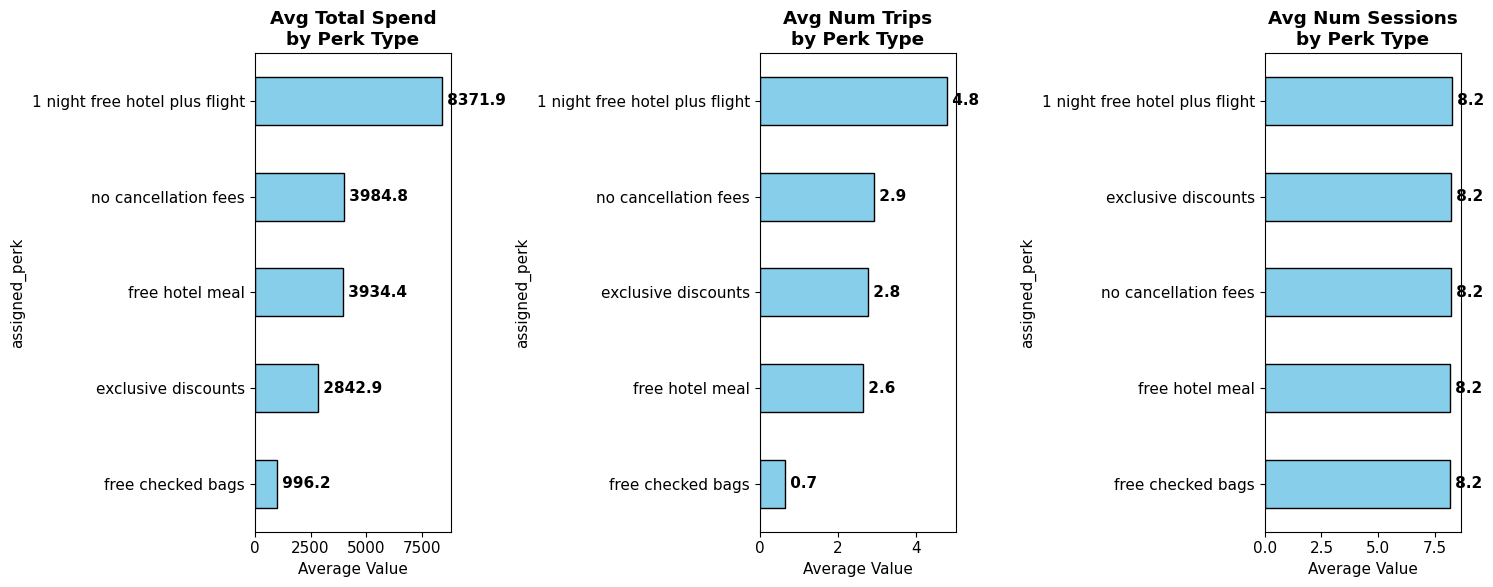

✅ Perk Effectiveness completed successfully

▶️  Running: Business Impact

💼 BUSINESS IMPACT & MARKETING RECOMMENDATIONS

📊 SEGMENT BUSINESS VALUE:
                                                                           Segment                            Perk  Size Pct_of_Base    Avg_Spend   Total_Revenue Revenue_Share_Pct Avg_Trips
High-Intent Browsers & Spenders                    High-Intent Browsers & Spenders            no cancellation fees  1276   21.273758  3984.842079  5084658.493242         23.311706  2.927116
Baseline Travelers                                              Baseline Travelers             exclusive discounts  1433   23.891297  2842.899063  4073874.356983          18.67755   2.76134
VIP High-Frequency Spenders                            VIP High-Frequency Spenders  1 night free hotel plus flight   806   13.437813  8371.944743  6747787.462975         30.936678   4.78536
Group & Family Travelers / Heavy Baggage  Group & Family Travelers / Heavy Baggage          

In [41]:
analyzer.comprehensive_report()  # Execute all analyses and save outputs
